In [30]:
import json
import pandas as pd

In [31]:
players_list = pd.read_json("JSON_DATA/pro_players_list.json")
players_list.drop(columns = ['avatar','avatarmedium','avatarfull','profileurl', 'personaname', 'last_login', "full_history_time", "cheese", "fh_unavailable", "last_match_time", "plus", "is_locked", "is_pro", "locked_until"], inplace = True)

In [32]:
players_list.to_csv("CSV_DATA/players.csv")

In [33]:
for player_id in players_list.account_id:
    try:
        players_games = pd.read_json("JSON_DATA/" + str(player_id) + ".json")
        players_games["side"] = (players_games["player_slot"]>100).astype(int)
        players_games["win"] = abs(players_games["side"]-players_games["radiant_win"])
        players_games.drop(columns = ['radiant_win','player_slot'], inplace = True)
        players_games.to_csv("CSV_DATA/" + str(player_id) + ".csv")
    except:pass

In [ ]:
name = input()

In [55]:
players = pd.read_csv('CSV_DATA/players.csv')
a = str(int(players.loc[players["name"] == "iceiceice"]["account_id"].values))

In [65]:
matches = pd.read_csv('CSV_DATA/' + a + '.csv')

In [66]:
matches.head()

,Unnamed: 0,match_id,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,average_rank,leaver_status,party_size,side,win
0,0,6649082276,2757,2,1,29,1657044485,21.0,1,4,17,NaN,NaN,0,10.0,0,1.0
1,1,6648984612,2871,2,1,98,1657039867,21.0,6,5,14,NaN,NaN,0,10.0,1,1.0
2,2,6648906883,1737,2,1,38,1657036502,21.0,0,10,4,NaN,NaN,0,10.0,0,0.0
3,3,6639062739,2499,2,1,49,1656435484,21.0,2,6,19,NaN,NaN,0,10.0,0,1.0
4,4,6638966184,1929,2,1,47,1656431734,21.0,13,5,9,NaN,NaN,0,10.0,1,1.0


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [67]:
import numpy as np

In [68]:
matches.win = np.where(matches.win == 0, -1, 1)

In [82]:
matches_sort = matches.sort_values(by=['match_id'])

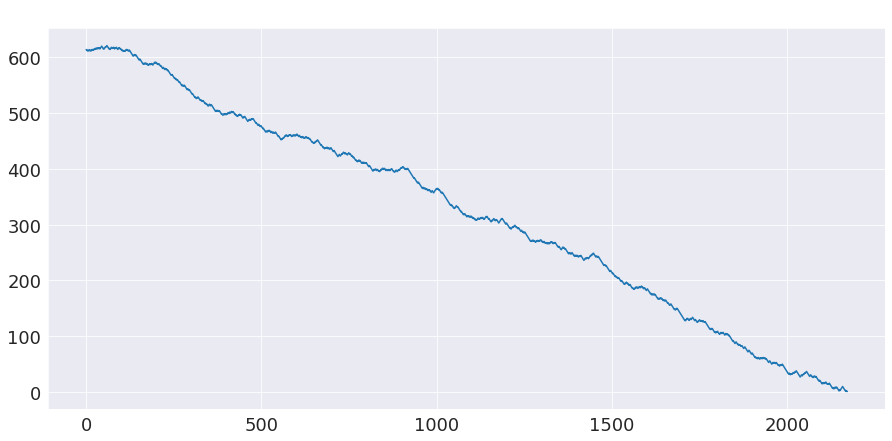

In [79]:
plt.figure(figsize=(15, 7))
plt.rcParams.update({'font.size': 18})
plt.title(' ')
plt.plot(matches_sort.win.cumsum())